<pre>

1  The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 

<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $


## Recommendation System 

<pre>
Recommendation system is type of system that has ability to recommend. 
Recommendation can be of various things like you recommending your friend 
to buy something that you like or u recommending your friend to watch the series you watch. 

This kind of recommendation helps to make user experience easy and less time consuming as you dont have to spend much time surfing internet that you like. This is the reason why big internet company pays a big chunk of money in building the best recommendation system in their product.

There are generally two type of recommendation system.
1. Content based.
2. Collaborative filtering.

Since Content based is easy as it can be translated in the regression or classification problem.
Regression  when we have to predict the rating of the movie by the user and Classification when we have to predict what might user like .

<font color="RED">Note: It is mostly domain specific whether or not you want to formulate your problem as Regression or Classification.</font>


In this we typically have information 
about the user. The information might be 

    1. Geo location.
    2. Device he is using.
    3. Surfying from.
    4. Have taste in which product and many more.
    
    
As this post is not about regression or classification we will mostly focus on Collaborative filtering type of 
recommendation system.
Recommending using collaborative include <b>Cosine similarity</b> computation or <b> Knn distance</b> Calculation.
But in this article is will be discussion about <b> Matrix Factorization.</b>

<font color='red'>Matrix Factorization</font>

Matrix Factorization is decompostion of higher matrix in smaller matrix. I usually seems this problem as <font color="red">(a+b)^2 = (a^2+2ab+b^2)</font> as here also bigger function are broken down in to smaller subset to get eact values which reduce computaion and is less time comsuming.
So, by that we have clear understanding if we break the higher matrix we can compute faster.So this is the basic idea of decomposition i.e Factorization.

So how does this thing is useful in recommendation sytem?
Ans is simple as we have the sparse matrix of the A with B. we could fill the sparsness of the matrix just by predicting whether or not user would like the item B which he has never tasted.


let take the example of netflix.

User will not have seen all the movie present in the netfilx so matrix will be sparse. So how do we identify if user will like the movie or not.
Here where Matrix Factorization comes in handy.

let A be the matrix which is decomposed into B and C.
as,
</pre>
$A_{n*m}$  = $B_{n*d}$ * $C_{d*m}$
<pre>
where d > 0 and d <= min(n,m)<br>
so for user and rating <br>
</pre>
B becomes $User_{i}$ and C becomes $Rating_{i}$ <br>
<pre>
So with this logic
</pre>
${A}_{i,j}$ = ${B}_{i} * ${C}_{j}
<pre>
where,
</pre>
${A}_{i,j}$ 
<pre>
refers to multiplication of Ith column of B with Jth colum of C. ie B * C.Transpose
</pre>


<pre>
So, if we are able to get B and C it will form A. Less the differnce between the Non zero values of Matrix A with Matrix B * Matrix C.Tranpose. Now, this becomes the optimzation problem, where we have to minimize the A with B * C.Transpose. 

Optimization problem can be solved using simple SGD.
</pre>

<br>

<font color='red'> Reading the csv file </font>

In [56]:
import pandas as pd
import numpy as np
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [57]:
print("The unique set of user are  : ", data.user_id.unique().shape)
print("The unique movie are : ",data.item_id.unique().shape)

The unique set of user are  :  (943,)
The unique movie are :  (1662,)


In [58]:
from scipy.sparse import csr_matrix
adjacency_matrix = csr_matrix((data.rating.values,(data.user_id.values,data.item_id.values)))


In [59]:
print(adjacency_matrix.shape)
adjacency_matrix.toarray()


(943, 1681)


array([[5, 0, 4, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]], dtype=int64)

<font color='red'>Compute mean of ratings</font>

In [63]:
def m_u(ratings):

    return np.mean(ratings)

In [64]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='red'>Initialize $B_{i}$ and $C_{j}$

In [66]:
def initialize(dim):

    return np.zeros(dim)

In [79]:
dim= adjacency_matrix.shape[0]# give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [80]:
dim= adjacency_matrix.shape[1]# give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)
print(c_j.shape)

(1681,)


<font color='red'>Compute dL/db_i</font>

In [70]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):

    reg = 2 * alpha * b_i[user_id]
    der_loss = -2 * ( rating - mu - b_i[user_id] - c_j[item_id] - np.dot(U[user_id],V.T[item_id]))
    total = reg + der_loss
    return total


<font color='red'>Compute dL/dc_j</font>

In [72]:
def derivative_dc(user_id,item_id,rating,U,V,mu,alpha):

    reg=2*alpha*c_j[item_id]
    loss=-2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id]))
    der=reg+loss
    return der

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j


</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [74]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.utils.extmath import randomized_svd
y_act=data["rating"]

epochs = 20
alpha = 0.01
lr = 0.01
mse = []
U, Sigma, V = randomized_svd(adjacency_matrix, n_components=10,n_iter=5, random_state=None)
print(U.shape)
print(V.shape)
for epoch in tqdm(range(epochs)):
    y_pred = []
    for user_id,item_id,rating in zip(data.user_id,data.item_id,data.rating):
        dl_db = derivative_db(user_id,item_id,rating,U,V,mu,alpha)
        b_i[user_id] = b_i[user_id] - (lr * dl_db)
        dl_dc = derivative_dc(user_id,item_id,rating,U,V,mu,alpha)
        c_j[item_id] = c_j[item_id] - (lr * dl_dc)
        
    for user,item,rating in zip(data.iloc[:, 0], data.iloc[:, 1],data.iloc[:, 2]):
        pred=mu+b_i[user]+c_j[item]+np.dot(U[user],V.T[item])
        y_pred.append(pred)
    m= mean_squared_error(y_act,y_pred)
    mse.append(m) 
#     print(EPOCH"+" "+str(epoch+1))  
#     print("MSE :",m)

(943, 10)
(10, 1681)


100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


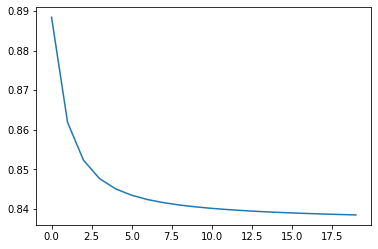

In [75]:
epochs = [ i for i in range(20)]
import matplotlib.pyplot as plt
plt.plot(epochs,mse)

<font color="red">Aternativing SGD</font>

In [84]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
y_act=data["rating"]

epochs = 40
alpha = 0.01
lr = 0.01
mse = []
# y_pred = []
U, Sigma, V = randomized_svd(adjacency_matrix, n_components=10,n_iter=5, random_state=None)
print(U.shape)
print(V.shape)
ids = 0
for epoch in tqdm(range(epochs)):
    y_pred = []
    ids +=1
    for user_id,item_id,rating in zip(data.user_id,data.item_id,data.rating):
        if ids//2==0:
            dl_db = derivative_db(user_id,item_id,rating,U,V,mu,alpha)
            b_i[user_id] = b_i[user_id] - (lr * dl_db)
        else:
            dl_dc = derivative_dc(user_id,item_id,rating,U,V,mu,alpha)
            c_j[item_id] = c_j[item_id] - (lr * dl_dc)
        
    for user,item,rating in zip(data.iloc[:, 0], data.iloc[:, 1],data.iloc[:, 2]):
        pred=mu+b_i[user]+c_j[item]+np.dot(U[user],V.T[item])
        y_pred.append(pred)
    m= mean_squared_error(y_act,y_pred)
    mse.append(m)

(943, 10)
(10, 1681)


100%|██████████| 20/20 [00:16<00:00,  1.20it/s]


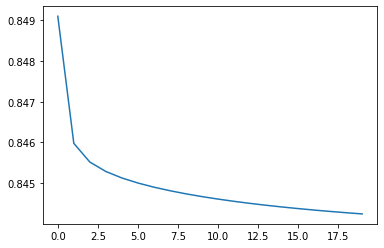

In [85]:
epochs = [ i for i in range(40)]
import matplotlib.pyplot as plt
plt.plot(epochs,mse)

In [89]:
print(y_act.head(), y_pred[:5])

0    3
1    5
2    4
3    4
4    5
Name: rating, dtype: int64 [2.3830049785286316, 3.8835739526271915, 3.8789183491870376, 3.5473716689836023, 4.160467695861582]


<br>

### <font color="red">Conclusion</font>

<pre>
. If we train the model for more epoch there will be significantily drop in loss.
. Model seems to perfom better.
. Training the model to optimize U and VT would result in much better performance.
</pre>